# Summer of Code - Artificial Intelligence

## Week 06: Linear Regression

### Day 02: Model Validation and Learning Curves

In this notebook, we will explore **model validation** techniques including cross-validation, and learning curves using Python's Scikit-Learn library.


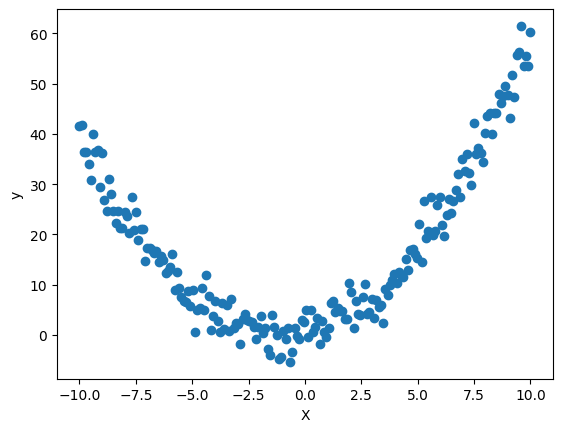

In [60]:
import numpy as np
import matplotlib.pyplot as plt


X = np.linspace(-10, 10, 200)
y = 0.5 * X ** 2 + X + np.random.normal(0, 3, X.shape)


plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [61]:
X.shape, y.shape

((200,), (200,))

In [62]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

X.shape, y.shape

((200, 1), (200, 1))

In [64]:
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()

lr_model.fit(X, y)

LinearRegression()

In [65]:
lr_model.intercept_

array([16.90030882])

In [66]:
lr_model.coef_

array([[0.96989349]])

In [67]:
y_pred = lr_model.predict(X)
y_pred.shape

(200, 1)

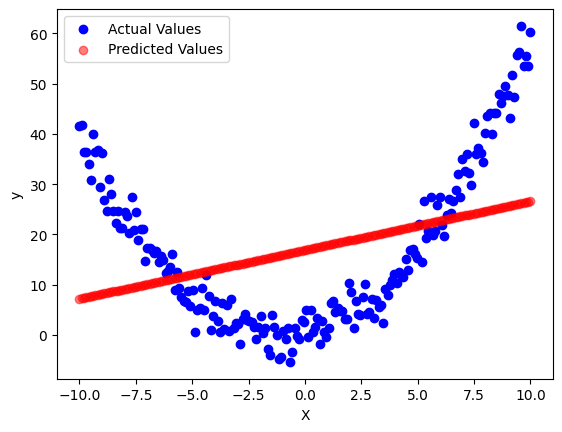

In [70]:
plt.scatter(X, y, c='blue', label='Actual Values')
plt.scatter(X, y_pred, c='red', label='Predicted Values', alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Polynomial Regression

In [72]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)
X_poly[0], X_poly.shape

(array([-10., 100.]), (200, 2))

In [74]:
poly_model = LinearRegression()

poly_model.fit(X_poly, y)

LinearRegression()

In [75]:
y_pred_poly = poly_model.predict(X_poly)

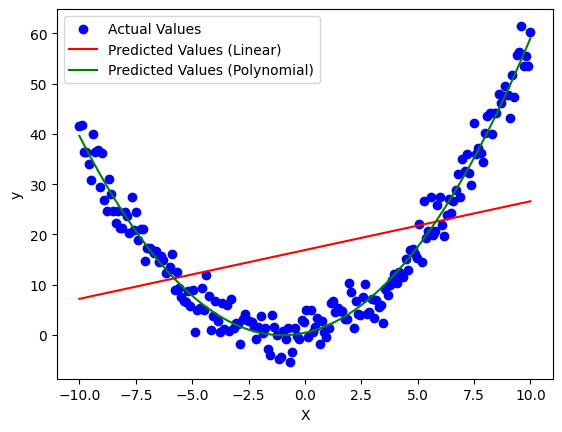

In [78]:
plt.scatter(X, y, c="blue", label="Actual Values")
plt.plot(X, y_pred, c="red", label="Predicted Values (Linear)",)
plt.plot(X, y_pred_poly, c="green", label="Predicted Values (Polynomial)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [87]:
poly_overfit = PolynomialFeatures(degree=20, include_bias=False)

X_poly = poly_overfit.fit_transform(X)
X_poly[0], X_poly.shape

(array([-1.e+01,  1.e+02, -1.e+03,  1.e+04, -1.e+05,  1.e+06, -1.e+07,
         1.e+08, -1.e+09,  1.e+10, -1.e+11,  1.e+12, -1.e+13,  1.e+14,
        -1.e+15,  1.e+16, -1.e+17,  1.e+18, -1.e+19,  1.e+20]),
 (200, 20))

In [88]:
overfit_model = LinearRegression()

overfit_model.fit(X_poly, y)

LinearRegression()

In [89]:
overfit_pred = overfit_model.predict(X_poly)

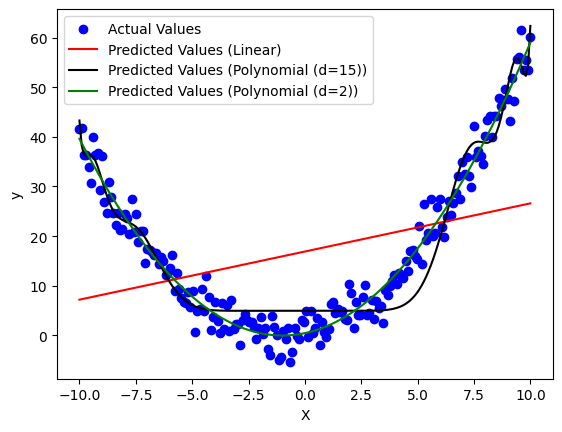

In [90]:
plt.scatter(X, y, c="blue", label="Actual Values")
plt.plot(
    X,
    y_pred,
    c="red",
    label="Predicted Values (Linear)",
)
plt.plot(
    X,
    overfit_pred,
    c="black",
    label="Predicted Values (Polynomial (d=15))",
)
plt.plot(X, y_pred_poly, c="green", label="Predicted Values (Polynomial (d=2))")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [94]:
from sklearn.metrics import root_mean_squared_error, r2_score


lr_rmse = root_mean_squared_error(y, y_pred)
lr_r2 = r2_score(y, y_pred)
poly_rmse = root_mean_squared_error(y, y_pred_poly)
poly_r2 = r2_score(y, y_pred_poly)
overfit_rmse = root_mean_squared_error(y, overfit_pred)
overfit_r2 = r2_score(y, overfit_pred)

print(f"Root Mean Squared Error of Simple Linear model: {lr_rmse}")
print(f"Root Mean Squared Error of degree 2 polynomial model: {poly_rmse}")
print(f"Root Mean Squared Error of degree 15 polynomial model: {overfit_rmse}")

print(f"\nR2 Score of Simple Linear model: {lr_r2}")
print(f"R2 Score of degree 2 polynomial model: {poly_r2}")
print(f"R2 Score of degree 15 polynomial model: {overfit_r2}")

Root Mean Squared Error of Simple Linear model: 14.976744596530581
Root Mean Squared Error of degree 2 polynomial model: 2.85197657227393
Root Mean Squared Error of degree 15 polynomial model: 4.379368437597192

R2 Score of Simple Linear model: 0.12372947481175978
R2 Score of degree 2 polynomial model: 0.9682242899697574
R2 Score of degree 15 polynomial model: 0.9250750736921697


In [95]:
import pandas as pd

data = pd.read_csv(
    r"C:\Users\DIPLAB\Desktop\Summer of Code - AI\datasets\california_house_prices\housing_cleaned.csv"
)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0.0,0.0,1.0,0.0


In [96]:
data.shape

(20640, 16)

In [98]:
list(data.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household',
 'ocean_INLAND',
 'ocean_ISLAND',
 'ocean_NEAR BAY',
 'ocean_NEAR OCEAN']

In [101]:
feature_columns = [
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "rooms_per_household",
    "bedrooms_per_room",
    "population_per_household",
    "ocean_INLAND",
    "ocean_ISLAND",
    "ocean_NEAR BAY",
    "ocean_NEAR OCEAN",
]
X = data[feature_columns]
X = X.values
type(X)

numpy.ndarray

In [103]:
y = data['median_house_value']
y = y.values.reshape(-1, 1)
y

array([[452600.],
       [358500.],
       [352100.],
       ...,
       [ 92300.],
       [ 84700.],
       [ 89400.]], shape=(20640, 1))

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=50
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=50
)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (12384, 14)
X_val shape: (4953, 14)
X_test shape: (3303, 14)


In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Mean of X_train_scaled: {X_train_scaled.mean():.4f}")
print(f"Mean of X_val_scaled: {X_val_scaled.mean():.4f}")
print(f"Mean of X_test_scaled: {X_test_scaled.mean():.4f}")

Mean of X_train_scaled: -0.0000
Mean of X_val_scaled: 0.0006
Mean of X_test_scaled: -0.0021


In [107]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

print(f"Bias (intercept) of the model: {lr_model.intercept_}")
print(f"Coefficients of the model: {lr_model.coef_}")

Bias (intercept) of the model: [207240.50298773]
Coefficients of the model: [[   -95.81940889  14227.78479342     88.22280664    184.95400266
  -42918.70198482  47859.76885699  79967.45223158   2900.59287424
   12287.10184158   -279.99593974 -29833.56111079   2781.48249318
    1785.00538844   4808.04792606]]


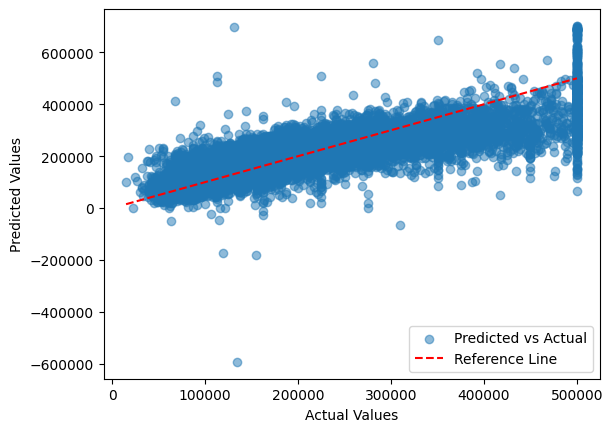

In [ ]:
plt.scatter(
    y_train, lr_model.predict(X_train_scaled), alpha=0.5, label="Predicted vs Actual"
)
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    "r--",
    label="Reference Line",
)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [111]:
# Performance on validation set
y_train_pred = lr_model.predict(X_train_scaled)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

y_val_pred = lr_model.predict(X_val_scaled)
val_rmse = root_mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Training RMSE: ${train_rmse}")
print(f"Training R^2: {train_r2}")

print(f"Validation RMSE: ${val_rmse}")
print(f"Validation R^2: {val_r2}")

Training RMSE: $69514.62618898012
Training R^2: 0.6389103024341141
Validation RMSE: $70582.52326334207
Validation R^2: 0.6287554854166064


In [112]:
X.shape, y.shape

((20640, 14), (20640, 1))

In [121]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train_scaled)

X_poly.shape

(12384, 119)

In [122]:
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
print(f"Bias (intercept) of the model: {poly_model.intercept_}")
print(f"Coefficients of the model: {len(poly_model.coef_[0])}")

Bias (intercept) of the model: [226164.79338419]
Coefficients of the model: 119


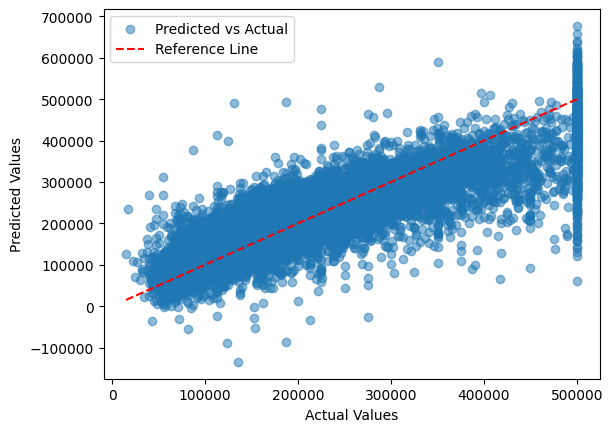

In [123]:
plt.scatter(
    y_train, poly_model.predict(X_poly), alpha=0.5, label="Predicted vs Actual"
)
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    "r--",
    label="Reference Line",
)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [124]:
# Performance on validation set
y_train_pred = poly_model.predict(X_poly)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

X_val_poly = poly_features.transform(X_val_scaled)
y_val_pred = poly_model.predict(X_val_poly)
val_rmse = root_mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Training RMSE: ${train_rmse}")
print(f"Training R^2: {train_r2}")

print(f"Validation RMSE: ${val_rmse}")
print(f"Validation R^2: {val_r2}")

Training RMSE: $62061.460494301435
Training R^2: 0.7121894579803656
Validation RMSE: $108055.11767586281
Validation R^2: 0.12992564802452577


# Learning Curves

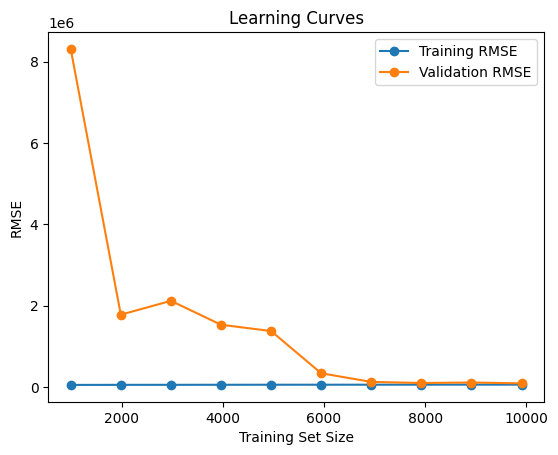

In [126]:
from sklearn.model_selection import learning_curve

# Learning Curves
train_sizes, train_scores, val_scores = learning_curve(
    poly_model,
    X_poly,
    y_train,
    cv=5,
    scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
)

train_rmse_mean = -np.mean(train_scores, axis=1)
val_rmse_mean = -np.mean(val_scores, axis=1)

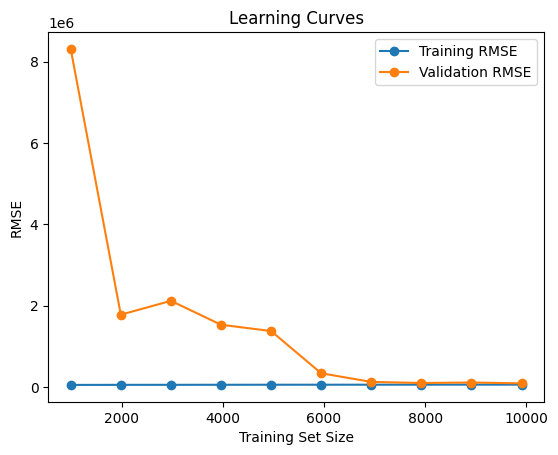

In [127]:
# plot learning curves
plt.plot(train_sizes, train_rmse_mean, label='Training RMSE', marker='o')
plt.plot(train_sizes, val_rmse_mean, label='Validation RMSE', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [128]:
from sklearn.model_selection import learning_curve

# Learning Curves
train_sizes, train_scores, val_scores = learning_curve(
    lr_model,
    X_train_scaled,
    y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10),
)

train_rmse_mean = -np.mean(train_scores, axis=1)
val_rmse_mean = -np.mean(val_scores, axis=1)

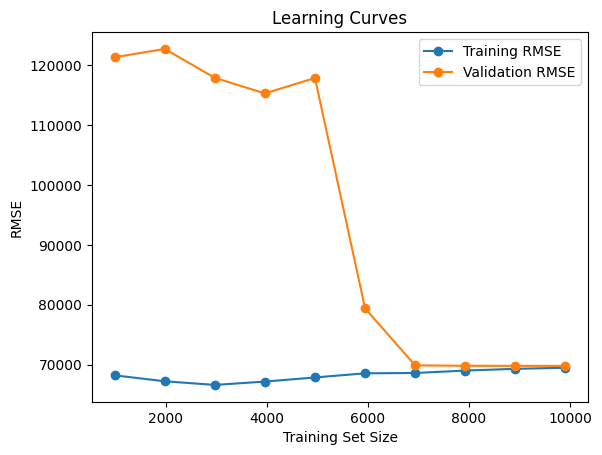

In [129]:
# plot learning curves
plt.plot(train_sizes, train_rmse_mean, label="Training RMSE", marker="o")
plt.plot(train_sizes, val_rmse_mean, label="Validation RMSE", marker="o")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curves")
plt.legend()
plt.show()